## OpenCV
**OpenCV** (англ. Open Source Computer Vision Library, библиотека компьютерного зрения с открытым исходным кодом) —
библиотека алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения с открытым кодом.

## Purpose

Цель ноутбука - изучение базовых методов работы с изображениями с помощью библиотеки OpenCV  

## Setup

In [1]:
!pip install opencv-python -U

In [2]:
!sudo apt-get update
!sudo apt-get install ffmpeg libsm6 libxext6  -y

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease                
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease              
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed

In [3]:
!sudo apt-get update && apt-get install -y python3-opencv

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease                
Hit:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease              
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease       
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [4]:
!pip install opencv-python

## Data Processing

### Начало работы с изображениями

#### Загрузка изображения

In [5]:
import numpy as np
import cv2

# Загрузка изображения 
# "1" - загрузка цветного изображения; прозрачность игнорируется
# "0" - загрузка изображения в оттенках серого
# "-1" - загрузка изображения "как есть", включая его альфа-канал
img = cv2.imread('Image/fox.jpg', 1)

**Альфа-канал** — пустое пространство, или просто прозрачность.

#### Отображение изображения

In [6]:
# # Вывод изображения в отдельном окне
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

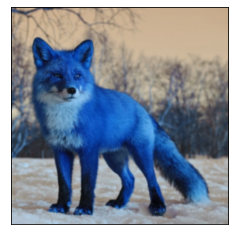

In [7]:
# Вывод в ноутбук с помощью matplotlib
# Цветное изображение, загруженное OpenCV, находится в режиме BGR. Но Matplotlib отображается в режиме RGB.
from matplotlib import pyplot as plt

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

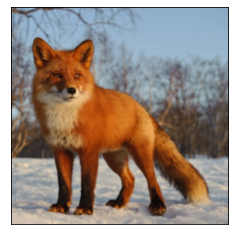

In [8]:
# Преобразование BGR в RGB 
img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

#### Сохранение изображения

In [9]:
cv2.imwrite('image.png',img)

True

### Функции рисования

In [10]:
# Создание пустого черного изображения
logo = np.zeros((512,512,3), np.uint8)

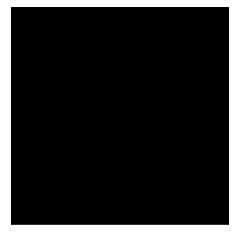

In [11]:
# Отображение исходного изображения
logo_rgb = cv2.cvtColor(logo , cv2.COLOR_BGR2RGB)
plt.imshow(logo_rgb, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

Координаты точек изображения увеличиваются слева направо, сверху вниз

In [12]:
#Создание большого красного круга и маленького черного круга в его центре
logo = cv2.circle(logo,(256, 175), 70, (0, 0, 255), -1)
logo = cv2.circle(logo,(256, 175), 30, (0, 0, 0), -1)
 
#Создание большого зеленого круга и маленького черного круга в его центре
logo = cv2.circle(logo,(180,307), 70, (0, 255, 0), -1)
logo = cv2.circle(logo,(180,307), 30, (0, 0, 0), -1)

#Создание черного треугольника для "обрезки" красного и зеленого кругов путем закрашивания
tr1 = np.array([[256,175],[180, 307],[332, 307]], np.int32)
tr1 = tr1.reshape((-1,1,2))
logo = cv2.fillPoly(logo, [tr1], 0)

#Создание большого синего круга и маленького черного круга в его центре
logo = cv2.circle(logo,(332, 307), 70, (255, 0, 0), -1)
logo = cv2.circle(logo,(332, 307), 30, (0, 0, 0), -1)

#Создание черного треугольника для "обрезки" синего круга путем закрашивания
tr2 = np.array([[332, 307],[288, 237],[376, 237]], np.int32)
tr2 = tr2.reshape((-1, 1, 2))
logo = cv2.fillPoly(logo, [tr2], 0)

#Добавление текста
font = cv2.FONT_HERSHEY_SIMPLEX
logo = cv2.putText(logo,'OpenCV',(108, 460), font, 2.5,(255, 255, 255),8,cv2.LINE_AA) 

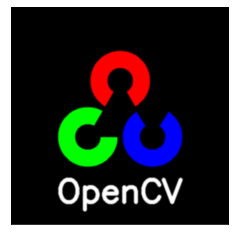

In [13]:
# Отображение итогового изображения
logo_rgb = cv2.cvtColor(logo , cv2.COLOR_BGR2RGB)
plt.imshow(logo_rgb, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

### Основные операции с изображениями

#### Работа со значениями пикселей изображения

In [14]:
# Получение значения пикселя по координатам столбца
px = img[500, 500]
print(px)

[ 17  87 178]


In [15]:
# Получение значения синего цвета в выбранном пикселе
blue  =  img [500, 500,  0] 
print(blue) 

17


In [16]:
# Изменение значений пикселей в указанной области
new_img = img.copy()
new_img[300:350, 300:350] = [255, 255, 255]

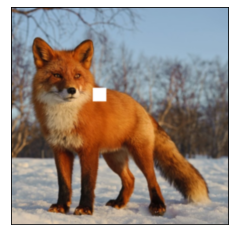

In [17]:
img_rgb = cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
# Получение значения красного цвета в выбранном пикселе
new_img.item(10,10,2)

98

In [19]:
# Изменение значения красного цвета в выбранном пикселе
new_img.itemset((10,10,2),0)
new_img.item(10,10,2)

0

#### Работа со свойствами изображения

In [20]:
# Получить свойства изображения - его размер и цветовой канал
print(img.shape)

(800, 800, 3)


In [21]:
# Получить общий размер изображения
print(img.size)

1920000


In [22]:
# Получить тип данных изображения
print(img.dtype)

uint8


#### Работа с каналами изображения

In [23]:
new_img = img.copy()

# Разделение каналов изображения
b,g,r = cv2.split(new_img)

# Соединение каналов в изображение
new_img = cv2.merge((b,g,r))

In [24]:
#Изменение красного канала изображения
new_img[:,:,2] = 0

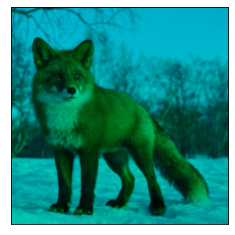

In [25]:
img_rgb = cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

#### Создание границ для изображений

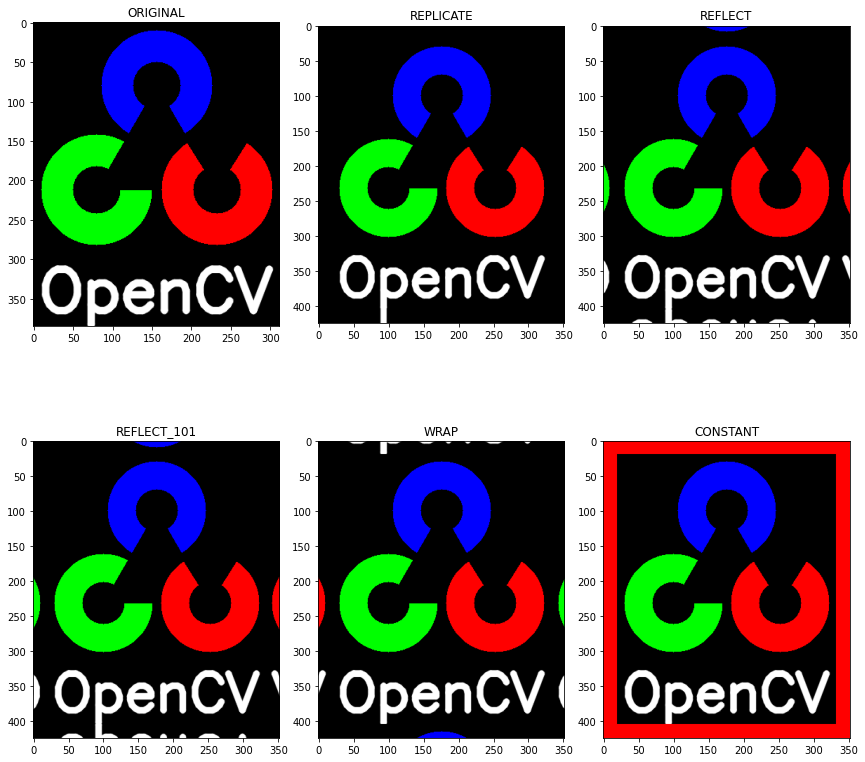

In [26]:
RED = [255,0,0]

logo1 = logo[95:480, 100:412].copy()

replicate = cv2.copyMakeBorder(logo1,20,20,20,20,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(logo1,20,20,20,20,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(logo1,20,20,20,20,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(logo1,20,20,20,20,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(logo1,20,20,20,20,cv2.BORDER_CONSTANT,value=RED)

plt.figure(figsize=(12, 12))

plt.subplot(231),plt.imshow(logo1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

# Автоматическая настройка параметров графиков для корректного отображения
plt.tight_layout()

plt.show()

### Арифметические операции с изображениями

In [27]:
x = np.uint8([250])
y = np.uint8([10])

In [28]:
print(cv2.add(x,y)) # 250+10 = 260 => 255

[[255]]


In [29]:
print(x + y)        # 250+10 = 260 % 256 = 4

[4]


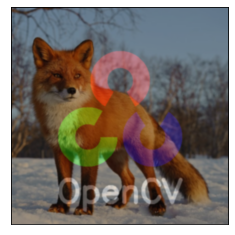

In [30]:
# Смешивание изображений
new_img = cv2.resize(img, (512, 512))
dst = cv2.addWeighted(new_img, 0.7, logo, 0.3, 0)
 
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

**ROI** (Region Of Interest — регион интересов — интересующая область изображения) — один из фундаментов OpenCV.

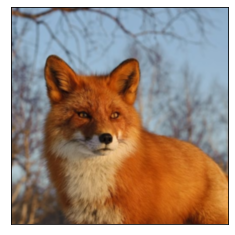

In [31]:
new_img = img.copy()

# Создание интересующей области (ROI) первого изображения 
rows,cols,channels = logo.shape
roi = new_img[0:rows, 0:cols ]

target_img = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4, 4))
plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

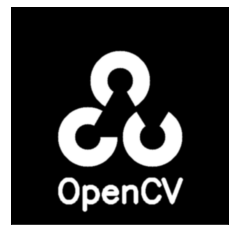

In [32]:
# Создание изображения в оттенках серого
logo_gray = cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)
# Создание маски логотипа с помощью пороговой функции
ret, mask = cv2.threshold(logo_gray, 10, 255, cv2.THRESH_BINARY)
# Создание инверсии маски логотипа с помощью инвертирования каждого бита изображения
mask_inv = cv2.bitwise_not(mask)

target_img = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4, 4))
plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

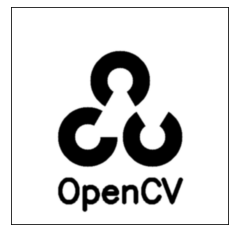

In [33]:
target_img = cv2.cvtColor(mask_inv, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4, 4))
plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

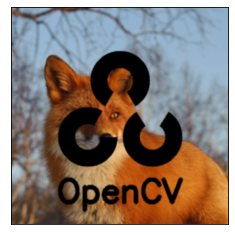

In [34]:
# Добавление темного логотипа в ROI
img_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

target_img = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4, 4))
plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

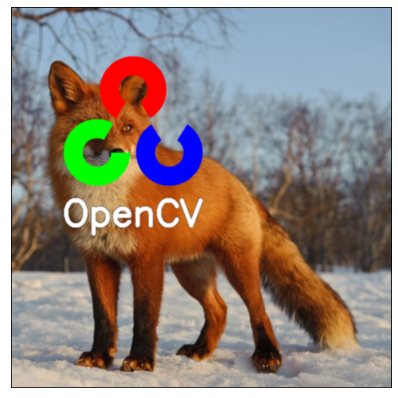

In [35]:
# Помещение логотипа в ROI
dst = cv2.add(img_bg,logo)
new_img[0:rows, 0:cols ] = dst

target_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7, 7))
plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

### Обнаружение нужного цвета

In [36]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

##### **HSV** (англ. Hue, Saturation, Value — тон, насыщенность, значение) — цветовая модель, в которой координатами цвета являются:

* **Hue** — цветовой тон, (например, красный, зелёный или сине-голубой). Приводится к диапазону 0—179.
* **Saturation** — насыщенность. Варьируется в пределах 0—255. Чем больше этот параметр, тем «чище» цвет, поэтому этот параметр иногда называют чистотой цвета. А чем ближе этот параметр к нулю, тем ближе цвет к нейтральному серому.
* **Value** (значение цвета). Также задаётся в пределах 0—255.

In [37]:
# Конвертирование BGR в HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
# Определение диапазона ораньжевого цвета в HSV
lower_orange = np.array([10,100,20])
upper_orange = np.array([15,255,255])

# Порог изображения(маска), чтобы получить только оранжевые цвета
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Побитовое умножение маски и оригинального изображения
res = cv2.bitwise_and(img, img, mask=mask)

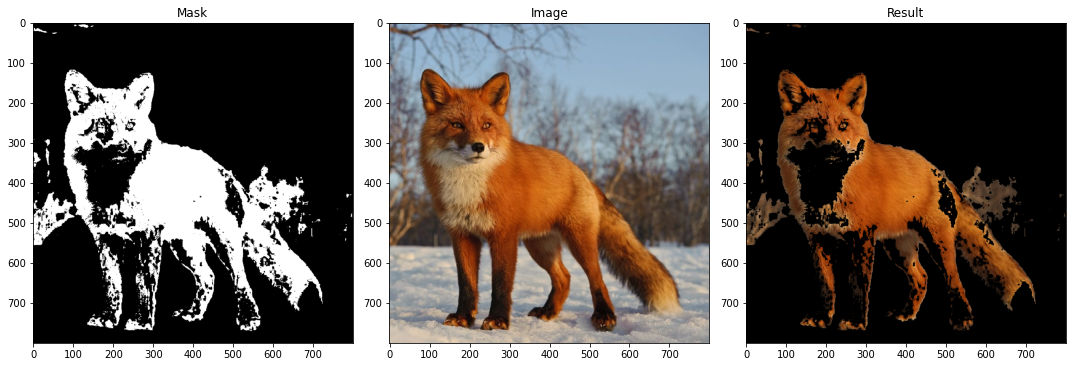

In [38]:
plt.figure(figsize=(15, 15))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(132),plt.imshow(img_rgb,'gray'),plt.title('Image')

mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.subplot(131),plt.imshow(mask_rgb,'gray'),plt.title('Mask')

res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.subplot(133),plt.imshow(res_rgb,'gray'),plt.title('Result')

# Автоматическая настройка параметров графиков для корректного отображения
plt.tight_layout()
plt.show()

### Геометрические преобразования изображний 

#### Масштабирование

In [39]:
#Увенличение размера изображения в 2 раза по осям "x" и "y"
res = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_LINEAR)

In [40]:
print(res.shape)

(1600, 1600, 3)


In [41]:
# cv2.imshow('result',res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Аффинное преобразование** (от лат. affinis «соприкасающийся, близкий, смежный») — отображение плоскости или пространства в себя, при котором параллельные прямые переходят в параллельные прямые, пересекающиеся — в пересекающиеся, скрещивающиеся — в скрещивающиеся. 

Преобразование плоскости называется **аффинным**, если оно непрерывно, взаимно однозначно и образом любой прямой является прямая.
    
Виды:
* **Смещение**
* **Поворот**
* **Растяжение-сжатие**

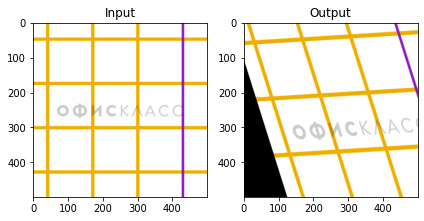

In [42]:
copybook = cv2.imread('Image/img.jpg')
rows,cols,ch = copybook.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[40,60],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(copybook,M,(cols,rows))

plt.subplot(121),plt.imshow(copybook),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

# Автоматическая настройка параметров графиков для корректного отображения
plt.tight_layout()

plt.show()

#### Смещение

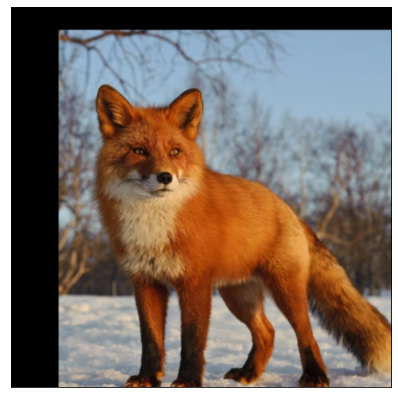

In [43]:
new_img = img.copy()
rows, cols = new_img.shape[:2]

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(new_img, M,(cols,rows))

target_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7, 7))
plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

#### Поворот

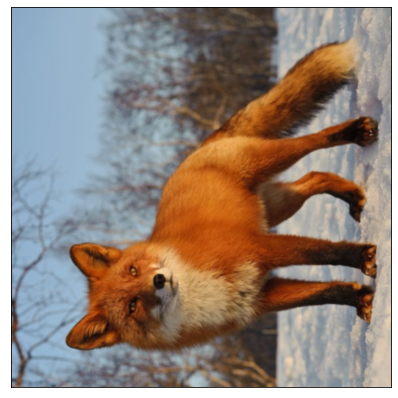

In [44]:
#Поворот на 90 градусов относительно центра
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(new_img, M,(cols,rows))

target_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7, 7))
plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

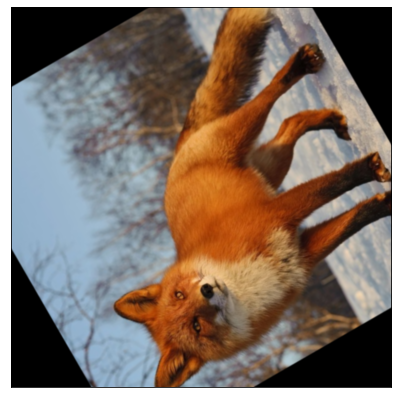

In [45]:
#Поворот на 120 градусов относительно центра
M = cv2.getRotationMatrix2D((cols/2,rows/2),120,1)
dst = cv2.warpAffine(new_img, M,(cols,rows))

target_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7, 7))
plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

#### Перспективное преобразование

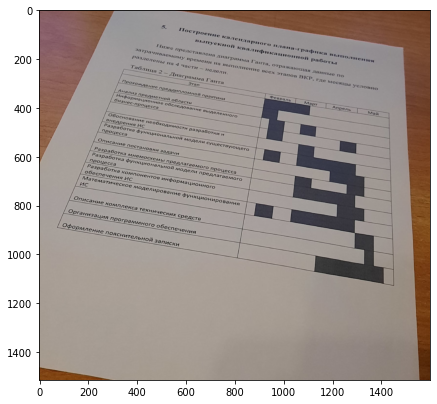

In [46]:
# Загрузка исходного изображекния
gant = cv2.imread('Image/gant.jpg')
rows,cols,ch = gant.shape

target_img = cv2.cvtColor(gant, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7, 7))
plt.imshow(target_img)
plt.show()

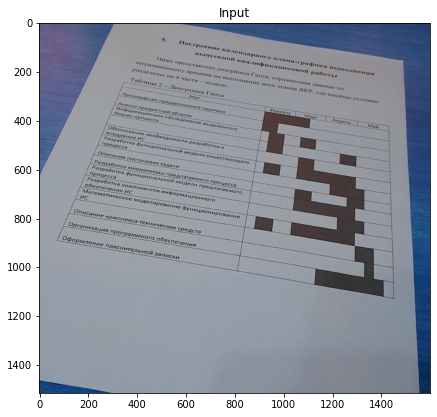

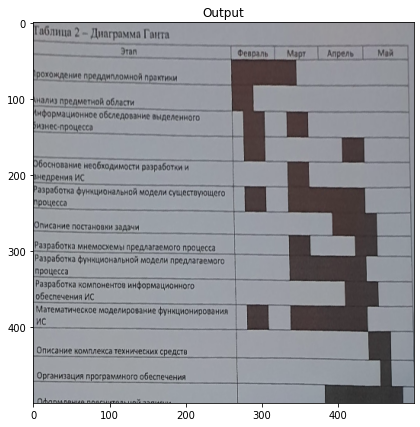

In [47]:
# Указание 4 точек на входном изображении
pts1 = np.float32([[380, 220],[1450, 390],[80, 880],[1450, 1100]])
# Указание 4 точек на выходном изображении
pts2 = np.float32([[0,0],[500,0],[0,500], [500,500]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(gant,M,(500,500))

plt.figure(figsize=(7, 7)), plt.imshow(gant),plt.title('Input')
plt.figure(figsize=(7, 7)), plt.imshow(dst),plt.title('Output')
plt.show()

**Аугментация данных** (англ. data augmentation) — это методика создания дополнительных данных из имеющихся данных.
Чаще всего, проблема ограниченного набора данных возникает при решении задач, связанных с обработкой изображений

### Сглаживание изображений

#### Создание шума

**Гауссовский шум** — это статистический шум, имеющий плотность вероятности, равную плотности вероятности нормального распределения, также известного как Гауссовское.

In [48]:
# Объявление функции создания шума Гауса
def noisy(image):
    row,col,ch= image.shape
    mean = 0
    var = 0.000005
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch) * 255
    noisy = cv2.add(image, gauss.astype(np.uint8))
    return noisy

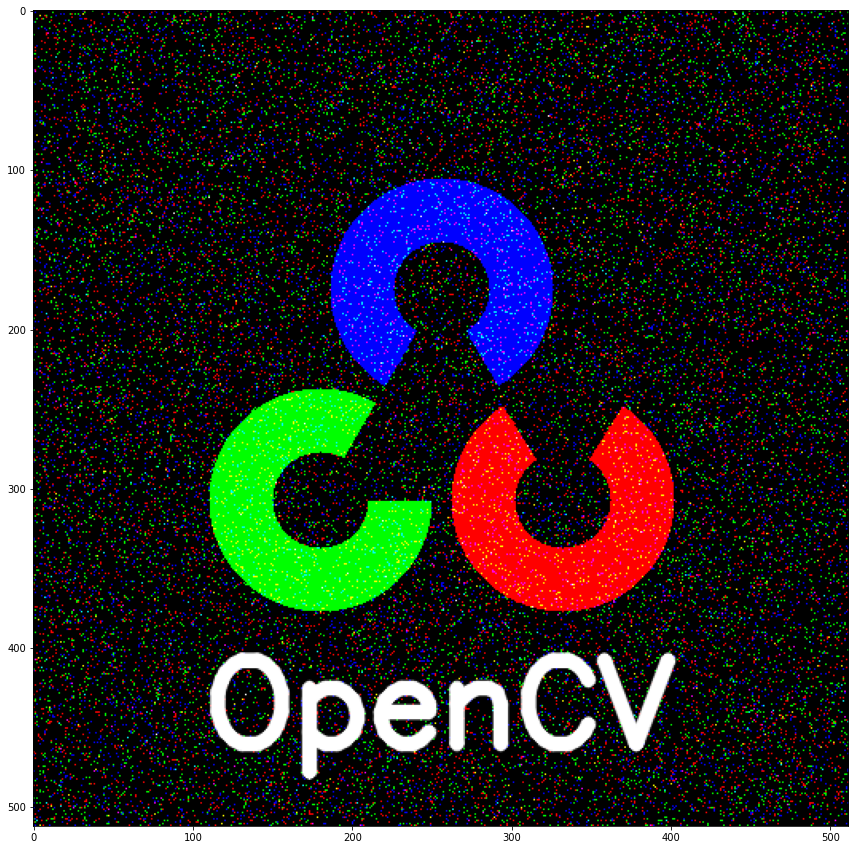

In [49]:
noisy_logo = noisy(logo)

plt.figure(figsize=(15, 15))
plt.imshow(noisy_logo)
plt.show()

#### 2D-свертка

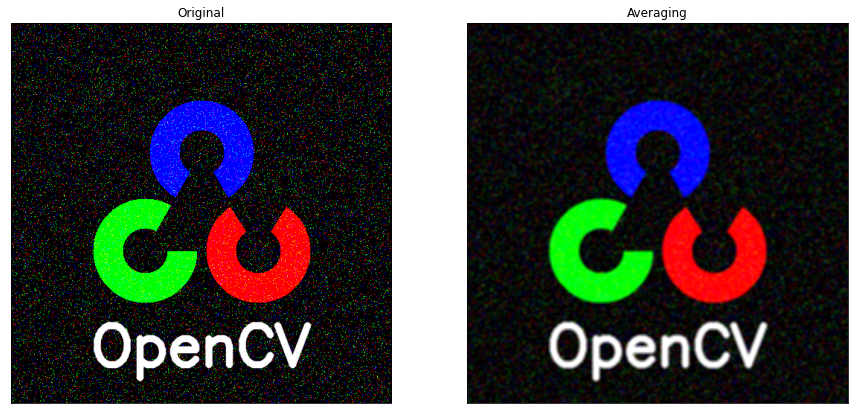

In [50]:
# Создание ядра усреднения
kernel = np.ones((5,5),np.float32)/25

noisy_logo = noisy(logo)
dst = cv2.filter2D(noisy_logo,-1,kernel)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(noisy_logo),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

#### Усреднение

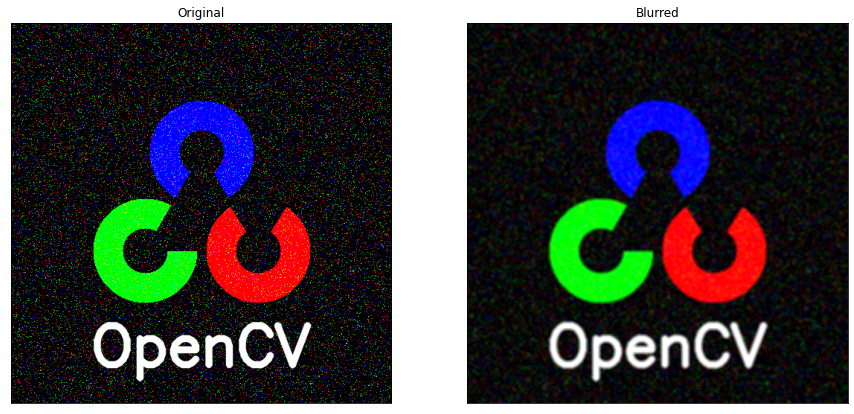

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

noisy_logo = noisy(logo)

# Усреднение
blur = cv2.blur(noisy_logo,(5,5))

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(noisy_logo),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Фильтр Гаусса

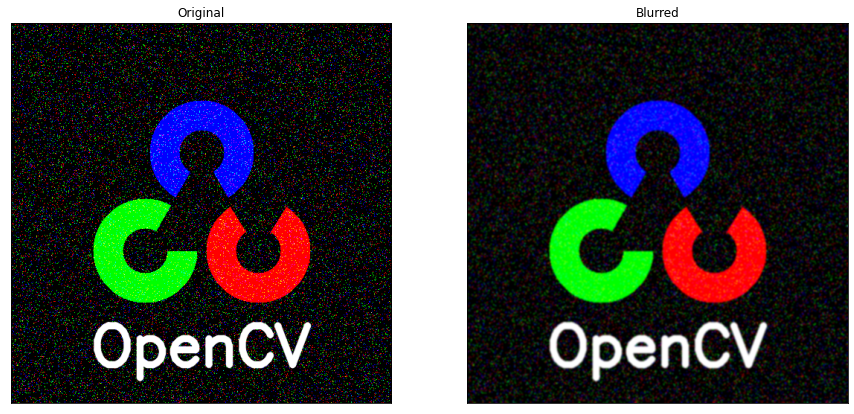

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

noisy_logo = noisy(logo)

blur = cv2.GaussianBlur(noisy_logo,(5,5),0)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(noisy_logo),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Медианная фильтрация

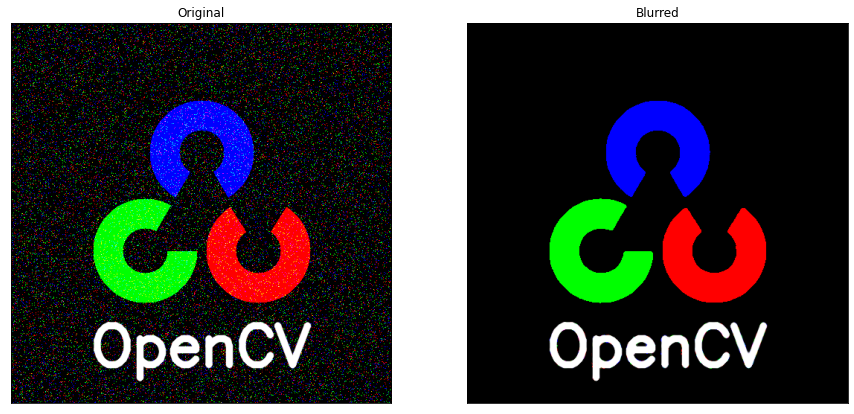

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

noisy_logo = noisy(logo)

median = cv2.medianBlur(noisy_logo, 5)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(noisy_logo),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Двусторонняя фильтрация

Особенности двусторонней фильтрации:
* Каждый пиксель заменяется средневзвешенным значением его соседей.
* Каждый сосед взвешивается по пространственному компоненту, который штрафует удаленные пиксели, и компоненту диапазона, который штрафует пиксели с разной интенсивностью.
* Комбинация обоих компонентов гарантирует, что только близлежащие похожие пиксели вносят вклад в окончательный результат

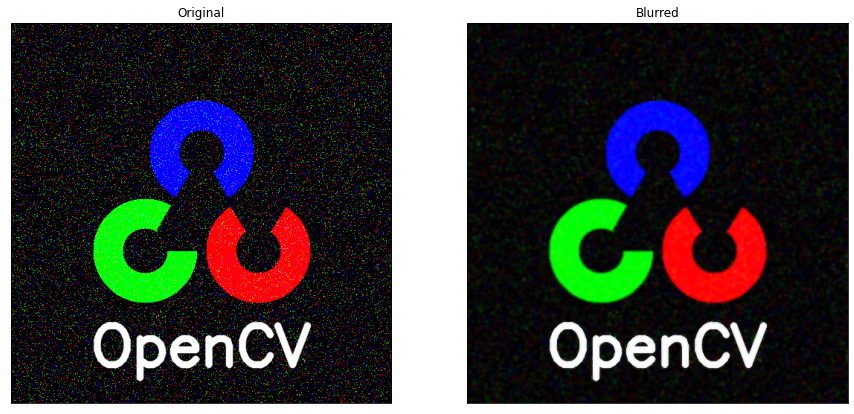

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

noisy_logo = noisy(logo)

blur = cv2.bilateralFilter(noisy_logo, 7, 300, 75)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(noisy_logo),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Морфологические преобразования

#### Эрозия

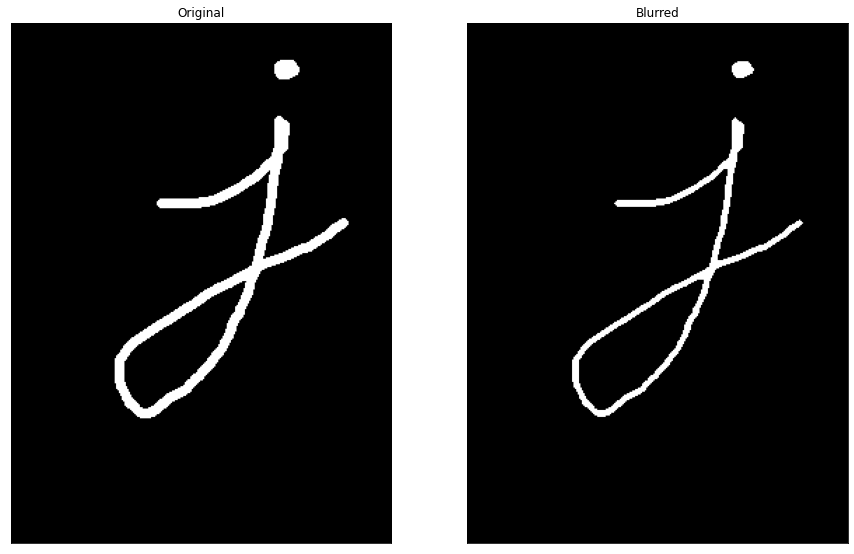

In [55]:
import cv2
import numpy as np

j = cv2.imread('Image/j.png', 0)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(j,kernel,iterations = 1)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(j, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion, cmap = 'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Расширение

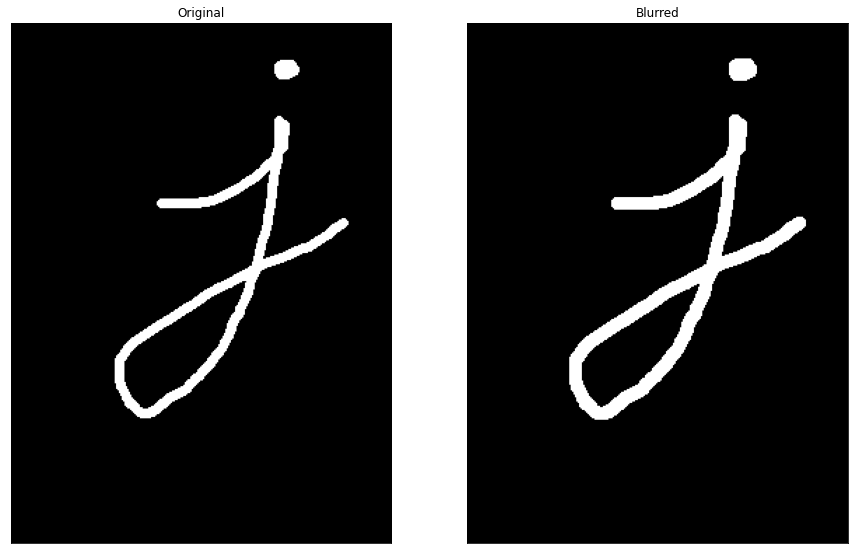

In [56]:
import cv2
import numpy as np

j = cv2.imread('Image/j.png', 0)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.dilate(j,kernel,iterations = 1)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(j, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion, cmap = 'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Открытие

Эрозия за которой следует Расширение

In [57]:
def add_salt_and_pepper(gb, prob):

    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy

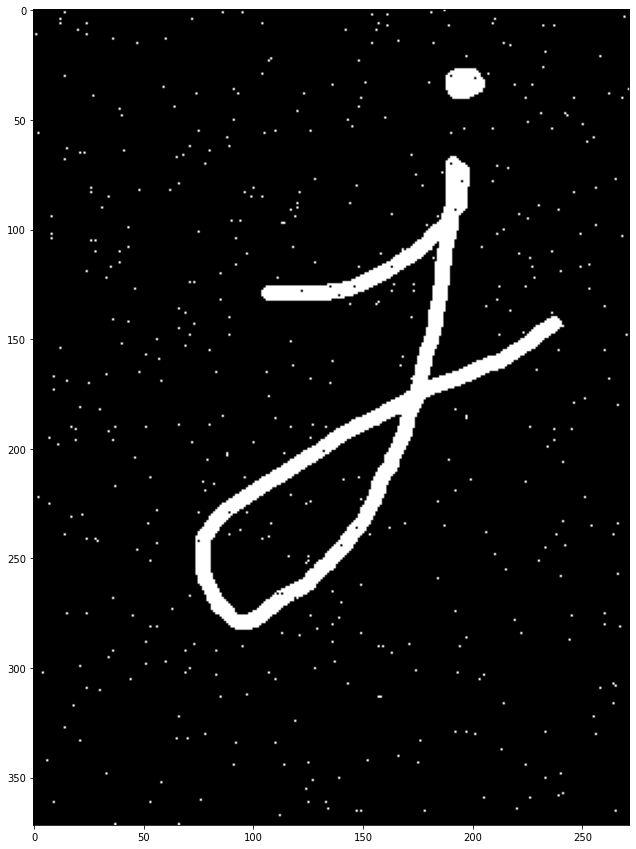

In [58]:
import cv2
import numpy as np

j = cv2.imread('Image/j.png', 0)
noisy_j = add_salt_and_pepper(j, 0.005)

plt.figure(figsize=(15, 15))
plt.imshow(noisy_j, cmap = 'gray')
plt.show()

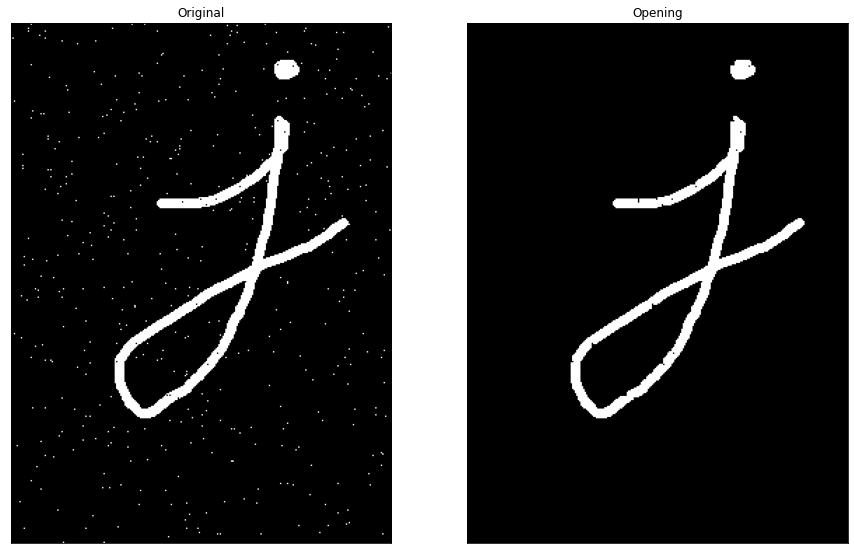

In [59]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(noisy_j, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(noisy_j, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening, cmap = 'gray'),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

#### Закрытие

Расширение за которым следует Эрозия

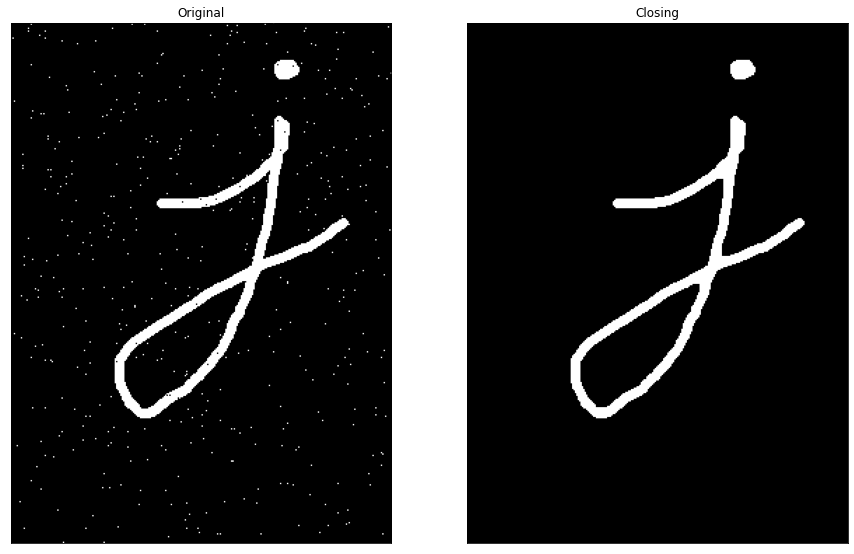

In [60]:
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(j, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(noisy_j, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing, cmap = 'gray'),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

#### Морфологический градиент

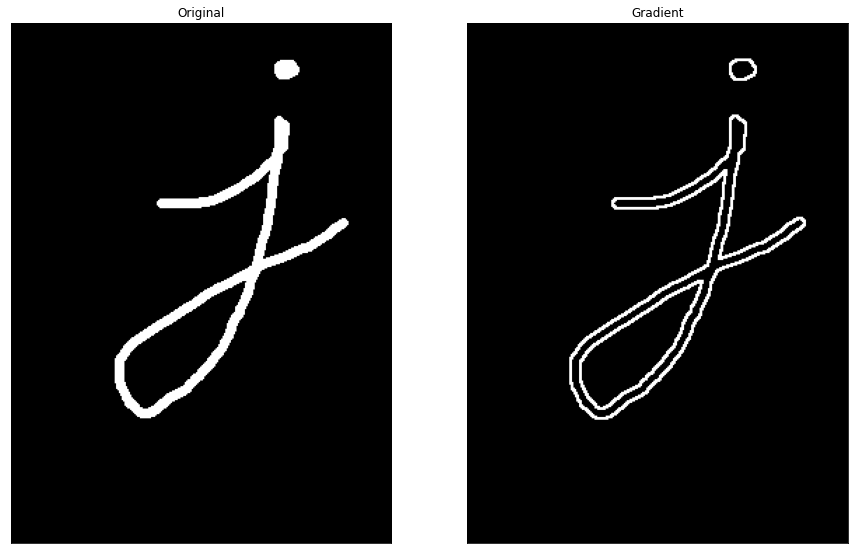

In [61]:
import cv2
import numpy as np

j = cv2.imread('Image/j.png', 0)
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(j, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(j, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient, cmap = 'gray'),plt.title('Gradient')
plt.xticks([]), plt.yticks([])
plt.show()

#### Цилиндр

Разница между входным изображением и его открытием.

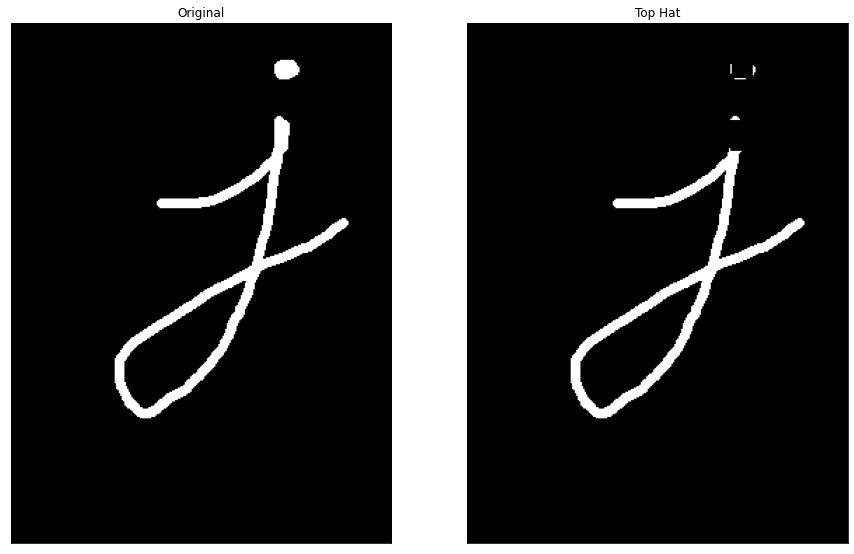

In [62]:
import cv2
import numpy as np

j = cv2.imread('Image/j.png', 0)
kernel = np.ones((9,9),np.uint8)
tophat = cv2.morphologyEx(j, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(j, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat, cmap = 'gray'),plt.title('Top Hat')
plt.xticks([]), plt.yticks([])
plt.show()

#### Черная шляпа

Разница между входным изображением и его закрытием.

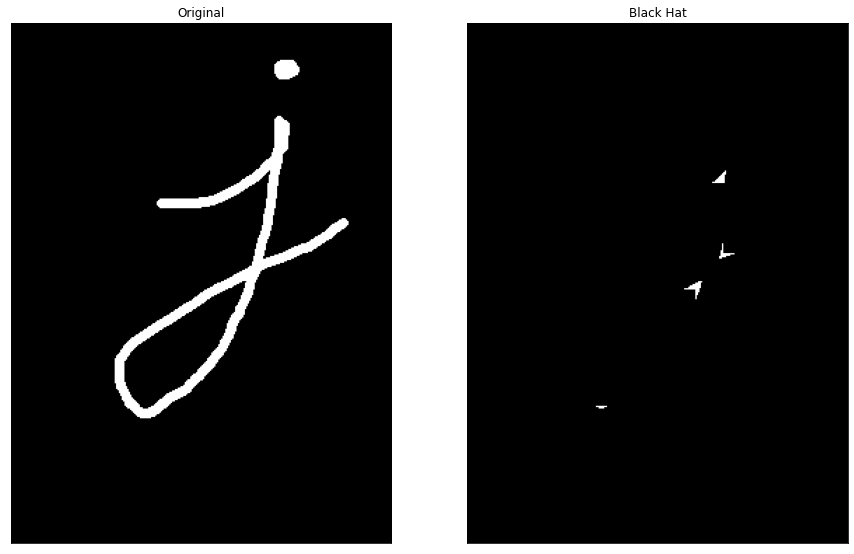

In [63]:
import cv2
import numpy as np

j = cv2.imread('Image/j.png', 0)
kernel = np.ones((9,9),np.uint8)
blackhat = cv2.morphologyEx(j, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(j, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blackhat, cmap = 'gray'),plt.title('Black Hat')
plt.xticks([]), plt.yticks([])
plt.show()

#### Структурные элементы

In [64]:
# Прямоугольное ядро
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [65]:
# Эллиптическое ядро
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [66]:
# Крестообразное ядро
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### Пороговое преобразование

#### Простой порог

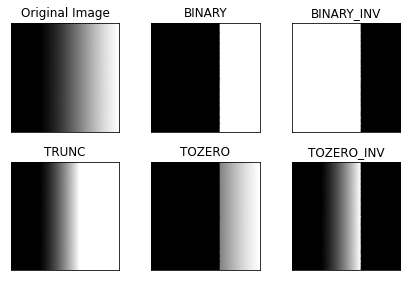

In [67]:
grad = cv2.imread('Image/gradient.jpg',0)
# Бинарный порог - если значение больше указанного порога, оно принимает заданное значение, если меньше - 0 (черный)
ret, thresh1 = cv2.threshold(grad,127,255,cv2.THRESH_BINARY)
# Обратный бинарный порог - если значение меньше указанного порога, оно принимает заданное значение, если больше - 0 (черный)
ret, thresh2 = cv2.threshold(grad,127,255,cv2.THRESH_BINARY_INV)
# Усечение - если значение больше указанного порога, оно принимает заданное значение, если меньше - значение не изменяется
ret, thresh3 = cv2.threshold(grad,127,255,cv2.THRESH_TRUNC)
# Обнуление - если значение меньше указанного порога, оно принимает значение 0, если больше - значение не изменяется
ret, thresh4 = cv2.threshold(grad,127,255,cv2.THRESH_TOZERO)
# Обратное обнуление - если значение больше указанного порога, оно принимает значение 0, если меньше - значение не изменяется
ret, thresh5 = cv2.threshold(grad,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [grad, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.tight_layout()

plt.show()

#### Адаптивный порог

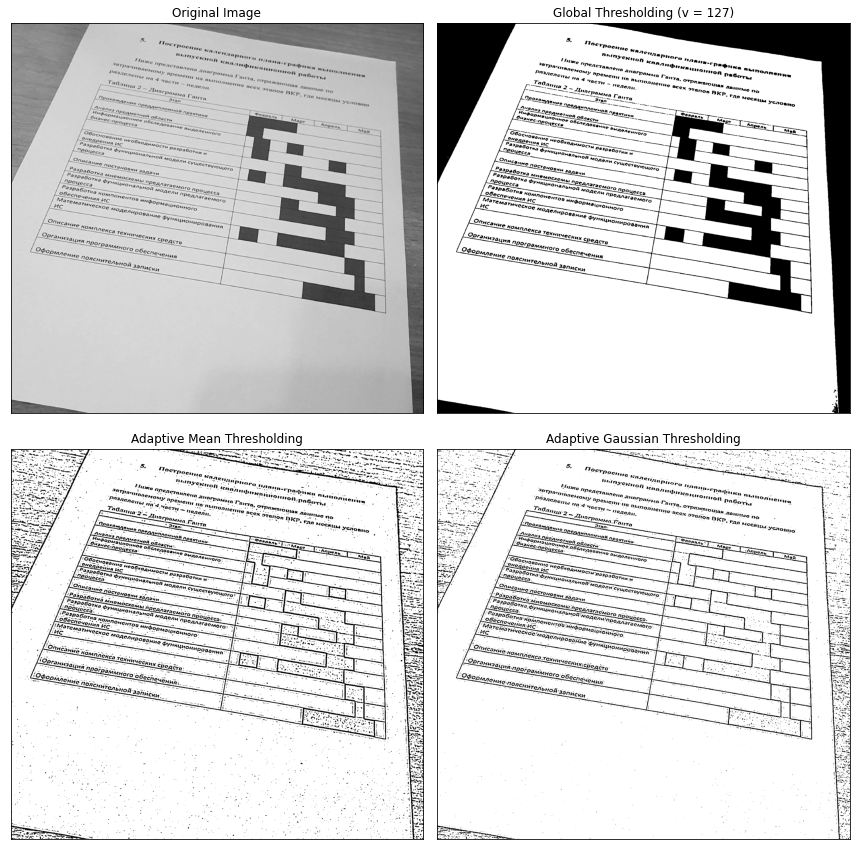

In [68]:
gant = cv2.imread('Image/gant.jpg', 0)
# Применение медианной фильтрации (сглаживания)
new_gant = cv2.medianBlur(gant, 3)

ret,th1 = cv2.threshold(new_gant,127,255,cv2.THRESH_BINARY)

# Пороговое значение = (Среднее значение площади соседства - константа), где 11 - размер района, а 2 - константа
th2 = cv2.adaptiveThreshold(new_gant,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Пороговое значение = (взвешенная по Гауссу сумма значений соседства - константа), где 11 - размер района, а 2 - константа
th3 = cv2.adaptiveThreshold(new_gant,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [new_gant, th1, th2, th3]

plt.figure(figsize=(12, 12))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.tight_layout()
plt.show()

#### Бинаризация Оцу

**Метод Оцу** - это алгоритм вычисления порога бинаризации для полутонового изображения, используемый в области компьютерного распознавания образов и обработки изображений для получения чёрно-белых изображений.

Алгоритм позволяет разделить пиксели двух классов («полезные» и «фоновые»), рассчитывая такой порог, чтобы внутриклассовая дисперсия была минимальной.

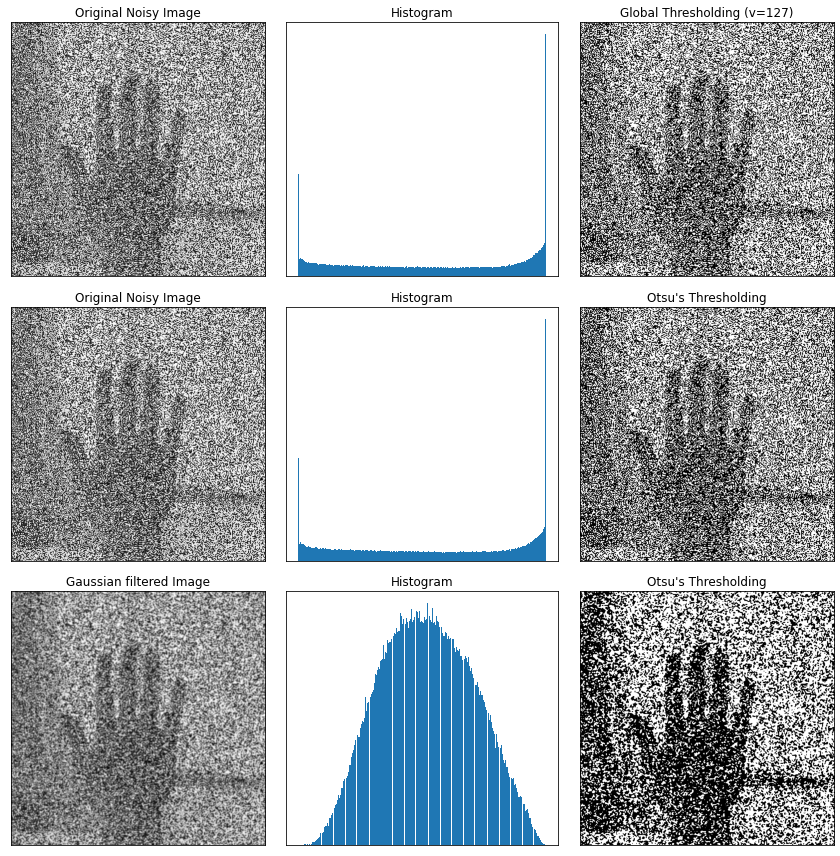

In [69]:
noisy_img = cv2.imread('Image/noisy1.jpg',0)

# Простой порог
ret1,th1 = cv2.threshold(noisy_img,127,255,cv2.THRESH_BINARY)

# Бинаризация Оцу
ret2,th2 = cv2.threshold(noisy_img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Бинаризация Оцу после фильтра Гаусса
blur = cv2.GaussianBlur(noisy_img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

images = [noisy_img, 0, th1,
          noisy_img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(12, 12))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    
plt.tight_layout()    
plt.show()

## References

1. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html